In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [11]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


C:\Users\12368\AppData\Local\Temp\ipykernel_16696\3945773010.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Height'])


<Axes: xlabel='Height', ylabel='Density'>

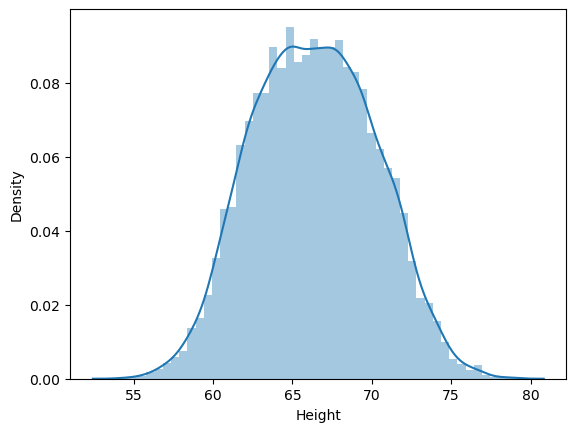

In [13]:
sns.distplot(df['Height'])

<Axes: xlabel='Height'>

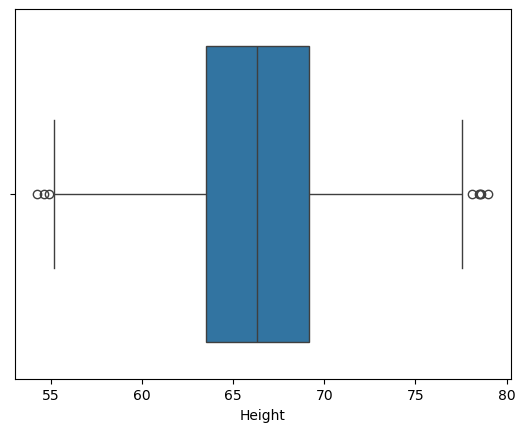

In [17]:
sns.boxplot(df['Height'], orient='h')

In [23]:
lower_bound = df['Height'].quantile(0.01)
upper_bound = df['Height'].quantile(0.99)

In [25]:
df[(df['Height'] <= lower_bound) | (df['Height'] >= upper_bound)]

,Gender,Height,Weight
23,Male,75.205974,228.761781
190,Male,76.709835,235.035419
197,Male,75.944460,231.924749
202,Male,75.140821,224.124271
215,Male,74.795375,232.635403
...,...,...,...
9761,Female,56.975279,90.341784
9825,Female,55.979198,85.417534
9895,Female,57.740192,93.652957
9904,Female,57.028857,101.202551


These are all outliers

In [30]:
# create a new_df by removing these outliers
new_df = df[(df['Height'] >= lower_bound) & (df['Height'] <= upper_bound)]

In [32]:
new_df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


C:\Users\12368\AppData\Local\Temp\ipykernel_16696\4235150873.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Height'])
C:\Users\12368\AppData\Local\Temp\ipykernel_16696\4235150873.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['Height'])


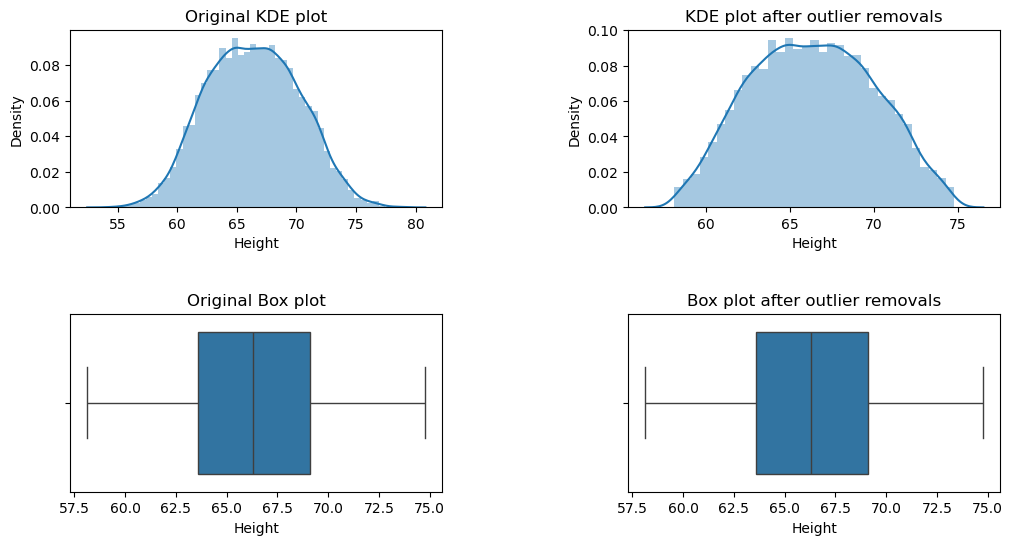

In [74]:
# plotting the Height column to see changes in the distribution after removing outliers
fig = plt.figure(figsize=(12, 6))
fig.add_subplot(2, 2, 1)
plt.title("Original KDE plot")
sns.distplot(df['Height'])

fig.add_subplot(2, 2, 2)
plt.title("KDE plot after outlier removals")
sns.distplot(new_df['Height'])

fig.add_subplot(2, 2, 3)
plt.title("Original Box plot")
sns.boxplot(new_df['Height'], orient='h')

fig.add_subplot(2, 2, 4)
plt.title("Box plot after outlier removals")
sns.boxplot(new_df['Height'], orient='h', legend='auto')

plt.subplots_adjust(hspace=0.6, wspace=0.5) #adjusts height and width between graphs

#### Capping

In [77]:
final_df = df.copy()
final_df['Updated_Height'] = np.where(
    final_df['Height'] >= upper_bound,
    upper_bound,
    np.where(
        final_df['Height'] <= lower_bound,
        lower_bound,
        final_df['Height']
    )
) 

In [79]:
final_df

,Gender,Height,Weight,Updated_Height
0,Male,73.847017,241.893563,73.847017
1,Male,68.781904,162.310473,68.781904
2,Male,74.110105,212.740856,74.110105
3,Male,71.730978,220.042470,71.730978
4,Male,69.881796,206.349801,69.881796
...,...,...,...,...
9995,Female,66.172652,136.777454,66.172652
9996,Female,67.067155,170.867906,67.067155
9997,Female,63.867992,128.475319,63.867992
9998,Female,69.034243,163.852461,69.034243
